<a href="https://colab.research.google.com/github/Artcods/Artcods/blob/main/Statistika_tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ANALISIS FAKTOR PENYEBAB OBESITAS DARI NEGARA MEKSIKO, PERU DAN KOLOMBIA**

---

Penelitian ini bertujuan untuk menganalisis faktor – faktor yang dapat
mempangaruhi tingkat obesitas dari negara Meksiko, Peru dan Kolombia berdasarkan kondisi fisik dan kebiasannya. Penulis menggunakan data yang diperoleh dari UC Irvine Machine Learning oleh Fabio Mendoza Palechor dan Alexis De la Hoz Manotas  pada tahun 2019 yang berisi 17 atribut dan  2112 record.

### **Insight**

Tugas Kelompok


---


1. Korelasi rokok dengan berat badan (SMOKE) **Hamid**

2. Korelasi makanan dengan berat badan (FAVC) **Nia**
3. Korelasi air putih dengan berat badan (CH2O) **Hamid**
4. Seberapa sering minum alkohol dg berat badan (CALC) **David**
5. Seberapa sering makan sayuran (FCVC) **Nia**
6. Berapa banyak makanan utama sehari(NCP) **Nia**
7. makan makanan apa pun di antara waktu makan(CAEC) **Dani**
8. memantau kalori yang Anda makan setiap hari (SCC) **David**
9. Seberapa sering aktifitas fisik (FAF) **Dani**
10. Seberapa sering menggunakan teknologi (TUE) **David**
11. Jumlah berat badan (bar chart) **Hamid**
12. Umur **Dani**

Analisis dan Insight


---


1. Korelasi rokok dengan NObeyesdad (SMOKE) **Hamid**
   > Korelasi Ganda variabel dependen "Rokok", "Makan Makanan Kalori Tinggi (FAVC)" dan variabel independen "NObeyesdad" kemudian hasil analisis dapat memberikan insight "Apakah Rokok dapat mempengaruhi obesitas seseorang?"
---
2. Korelasi makanan dengan NObeyesdad (FAVC) **Nia**
   > Korelasi Ganda variabel dependen "Kalori Tinggi (FAVC)", "Riwayat Keluarga (family_history_with_overweight)" dan variabel independen "NObeyesdad" kemudian hasil analisis dapat memberikan insight "Apakah kebanyakan makan membuat seseorang menjadi obesitas?"
---
3. Korelasi air putih dengan NObeyesdad (CH2O) **Hamid**
   > Korelasi variabel dependen "Air Putih (CH2O)" dan variabel independen "NObeyesdad" kemudian hasil analisis dapat memberikan insight "Apakah benar, jika seseorang terlalu banyak meminum air putih menyebabkan obesitas?"
---
4. Seberapa sering minum alkohol dengan NObeyesdad (CALC) **David**
   > Korelasi variabel dependen "NObeyesdad" dan variabel independen "Minum Alkohol (Always, Sometimes, Frequently, no)" kemudian hasil analisis dapat memberikan insight "Apakah seseorang pemabuk berat sudah dipastikan obesitas?"
---
5. Seberapa sering makan sayuran (FCVC)  **Nia**
   > Korelasi
---
6. Berapa banyak makanan utama sehari(NCP) **Nia**
   > Korelasi
---
7. makan makanan apa pun di antara waktu makan (CAEC) **Dani**
   > Korelasi variabel dependen "Makan Makanan Apapun diantara Waktu Makan (CAEC)" dan variabel independen "Kalori (FAVC)" kemudian hasil analisis dapat memberikan insight "Apakah, jika seorang makan makanan diantara waktu makan menyababkan naik kalori?"
---
8. memantau kalori yang Anda makan setiap hari (SCC) **David**
   > Korelasi Ganda variabel dependen "Memantau Kalori Setiap Hari" dan "Latihan Fisik (FAF)". Variabel Independen "Berat badan" kemudian hasil analisis dapat memberikan insight "Apakah seorang obesitas selalu latihan fisik dan memantau kalori dapat menurunkan berat badan?"
---
9. Seberapa sering aktifitas fisik (FAF) **Dani**
   > Korelasi variabel dependen "Sering Melakukan Aktifitas Fisik (Always)" dan variabel independen "Kalori (FAVC)" kemudian hasil analisis dapat memberikan insight "Apakah jika sering melakukan aktifitas fisik dapat menghindari makanan berkalori tinggi?"
---
10. Seberapa sering menggunakan teknologi (TUE) **David**
   > Korelasi Ganda variabel "sering menggunakan teknologi (Always)" dan "Jarang Latihan Fisik (sometimes)". Variabel independen "Berat Badan" kemudian hasil analisis dapat memberikan insight "Apakah benar. orang yang sering menggunakan teknologi dan jarang latihan fisik menyebabkan obesitas?"
---
11. Jumlah berat badan (bar chart) **Hamid**
   > Korelasi
---
12. Umur **Dani**
   > Buat sebaran nilai dengan rentang 5 (misal: 20-25) dan simpulkan berdasarkan Obesitas Level kemudian hasil analisis dapat memeberikan insight "Umur berapakah seseorang yang paling banyak memiliki obesitas?"

Keterangan


---


- **Gender**: Feature, Categorical, "Gender"
- **Age** : Feature, Continuous, "Age"
- **Height**: Feature, Continuous
- **Weight**: Feature Continuous
- **family_history_with_overweight**: Feature, Binary, " Has a family member suffered or suffers from overweight? "

- **FAVC** : Feature, Binary, " Do you eat high caloric food frequently? "
- **FCVC** : Feature, Integer, " Do you usually eat vegetables in your meals? "
- **NCP** : Feature, Continuous, " How many main meals do you have daily? "
- **CAEC** : Feature, Categorical, " Do you eat any food between meals? "
- **SMOKE** : Feature, Binary, " Do you smoke? "
- **CH2O**: Feature, Continuous, " How much water do you drink daily? "
- **SCC**: Feature, Binary, " Do you monitor the calories you eat daily? "
- **FAF**: Feature, Continuous, " How often do you have physical activity? "
- **TUE** : Feature, Integer, " How much time do you use technological devices - **such** as cell phone, videogames, television, computer and others? "

- **CALC** : Feature, Categorical, " How often do you drink alcohol? "
- **MTRANS** : Feature, Categorical, " Which transportation do you usually use? "
- **NObeyesdad** : Target, Categorical, "Obesity level"

### **Requirement Library/Package**


---



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Upload Dataset


---



In [18]:
obesity = pd.read_csv ("https://raw.githubusercontent.com/Artcods/Artcods/main/ObesityDataSet_2112.csv")

### **Explore Data**


---



In [19]:
# Menghitung jumlah orang yang terkena obesitas sesuai dengan nilai atribut NObeyesdad
obesitas_count = obesity['NObeyesdad'].value_counts().sort_index()

# Membuat DataFrame untuk tabel
tabel_obesitas = pd.DataFrame({'Atribut NObeyesdad': obesitas_count.index, 'Jumlah Orang': obesitas_count.values})

# Menampilkan tabel
print("Tabel Jumlah Orang Terkena Obesitas Sesuai Atribut NObeyesdad:")
print(tabel_obesitas)

Tabel Jumlah Orang Terkena Obesitas Sesuai Atribut NObeyesdad:
   Atribut NObeyesdad  Jumlah Orang
0                   0           272
1                   1           287
2                   2           290
3                   3           290
4                   4            47
5                   5           601
6                   6           324


### **Explanatory and Visualization**

---



#### Hamid

**Korelasi rokok dengan NObeyesdad (SMOKE) hamid**

-0.0068240122068753154


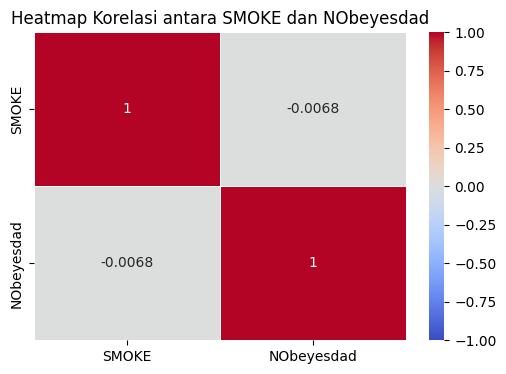

In [20]:
correlation_smoke = obesity['SMOKE'].corr(obesity['NObeyesdad'])
print(correlation_smoke)

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['SMOKE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara SMOKE dan NObeyesdad')
plt.show()

**Korelasi air putih dengan berat badan (CH2O) hamid**

0.1427420395603375


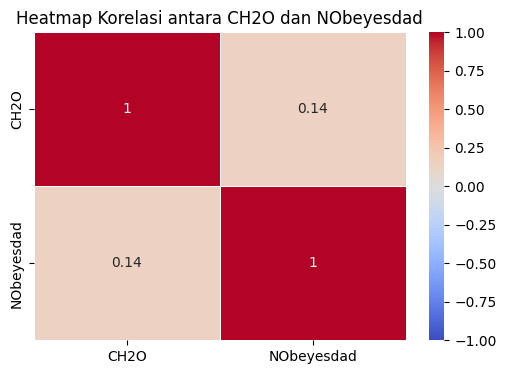

In [21]:
correlation_ch2o = obesity['CH2O'].corr(obesity['NObeyesdad'])
print(correlation_ch2o)

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['CH2O', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CH2O dan NObeyesdad')
plt.show()

**Jumlah berat badan (bar chart) Hamid**

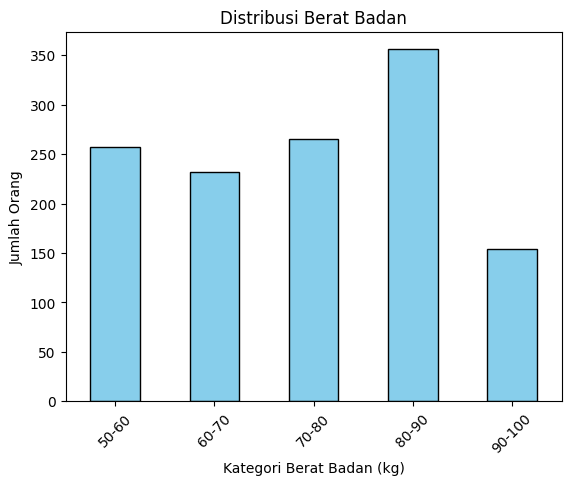

In [22]:
# Mengambil data dari kolom 'Weight'
weights = obesity['Weight']

# Menentukan kategori berat badan
weight_bins = [50, 60, 70, 80, 90, 100]
weight_categories = ['50-60', '60-70', '70-80', '80-90', '90-100']

# Menghitung jumlah orang untuk setiap kategori berat badan
weight_counts = pd.cut(weights, bins=weight_bins, labels=weight_categories, right=False).value_counts().sort_index()

# Membuat bar chart
weight_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Kategori Berat Badan (kg)')
plt.ylabel('Jumlah Orang')
plt.title('Distribusi Berat Badan')
plt.xticks(rotation=45)
plt.show()

#### Nia

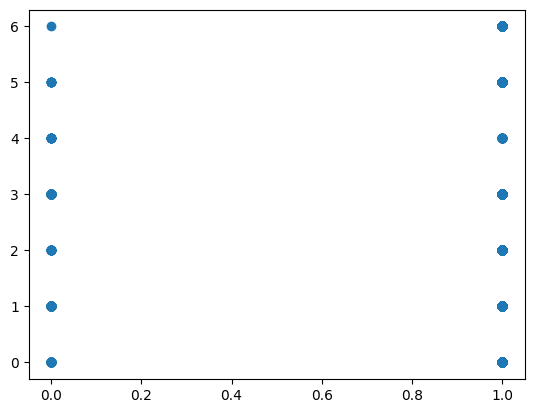

In [23]:
plt.scatter(obesity['FAVC'], obesity['NObeyesdad'])

In [24]:
correlation = obesity['FAVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi makanan junk food dan berat badan: {correlation}')

Korelasi antara frekuensi makanan junk food dan berat badan: 0.26178188703283256


#### David

**Korelasi meminum alkohol (CALC) dengan obesity level**

Korelasi antara frekuensi konsumsi alkohol dan obesity level: 0.11912952667948278


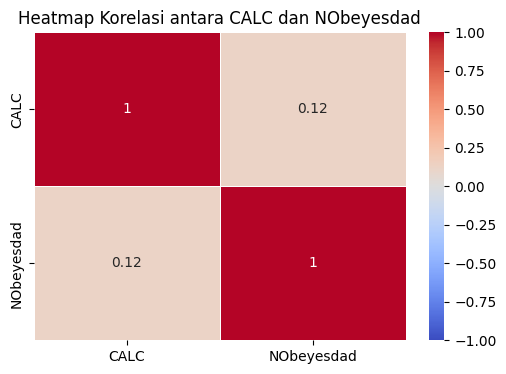

In [25]:
# Hitung korelasi antara 'CALC' dan 'NObeyesdad'
correlation = obesity['CALC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['CALC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

**Korelasi memantau kalori yang dimakan (SCC) dengan obesity lavel**

Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : -0.20090315100443995


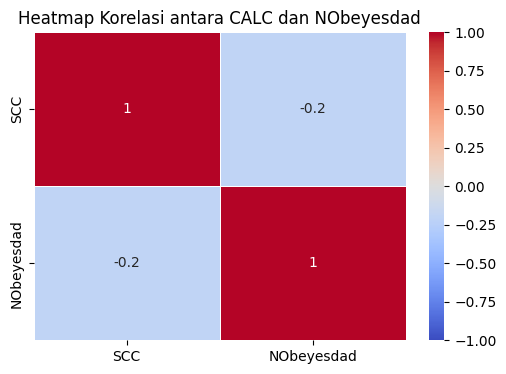

In [26]:
correlation = obesity['SCC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['SCC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

 **Korelasi menggunakan teknologi (TUE) dengan obesity lavel**

Korelasi antara frekuensi menggunakan teknologi dan obesity level : -0.07292741228400124


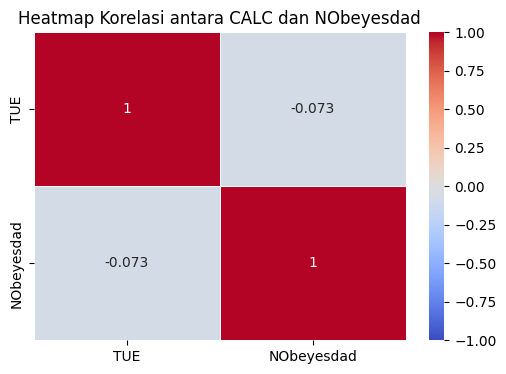

In [27]:
correlation = obesity['TUE'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi menggunakan teknologi dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['TUE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

#### Dani

makan makanan apa pun di antara waktu makan(CAEC)

In [28]:
correlation = obesity['CAEC'].corr(obesity['NCP'])
print(f'korelasi antara sering nya makan makanan di antara waktu makan dan berapa banyak makan utama sehari: {correlation}')

korelasi antara sering nya makan makanan di antara waktu makan dan berapa banyak makan utama sehari: 0.09458900505426134


Seberapa sering aktifitas fisik (FAF)

In [29]:
correlation = obesity['FAF'].corr(obesity['NObeyesdad'])
print(f'korelasi antara seberapa sering aktifitas fisik dan berat badan: {correlation}')

korelasi antara seberapa sering aktifitas fisik dan berat badan: -0.1911394473268565


Mencari Umur terbanyak

In [30]:
modeObesity = obesity['Age'].mode()
meanObesity = obesity['Age'].mean()
print('Berikut adalah jumlah pengidap Obesitas dari rentang umur yang tersedia :', modeObesity)
print('Berikut merupakan rata-rata umur yang paling banyak terkena Obesitas :', meanObesity)

Berikut adalah jumlah pengidap Obesitas dari rentang umur yang tersedia : 0    21
Name: Age, dtype: int64
Berikut merupakan rata-rata umur yang paling banyak terkena Obesitas : 24.315963998105165
